# Jakost gibanja plosce s tipali SensorTile.box

## Pregled ali se v Orange Data Mining izvede predprocesiranje podatkov pred klasifikacijo z nakljucnim gozdom (V tem primeru se zamenjajo le manjkajoce vrednosti, ki jih v nasih podatkih ni) 

In [2]:
import pickle

with open('../../Orange_Data_Mining/Jakost_gibanja/Nakljucni_gozd-Jakost_gibanja.pkcls', 'rb') as model:
    lr = pickle.load(model)

#lr.domain
lr.domain[0]

ContinuousVariable(name='F1_VAR_on_ACC_V',
                   number_of_decimals=3,
                   compute_value=ReplaceUnknowns(variable=ContinuousVariable(name='F1_VAR_on_ACC_V',
                                                      number_of_decimals=3),
                                   value=0.22330145150297734))

## Pretvorba nakljucnega gozda iz Orange Data Mining v ONNX format

In [25]:
import pickle

# pickleFile -> pickle file with random forest model
# onnxFile -> new onnx file with model converted from pickle file
# numberOffloatInputs -> number of features (here we are using floating point values (FloatTensorType), 
# if you want to use other data types they can be found in skl2onnx.common.data_types from the skl2onnx library)
def orangeToONNX(pickleFile, onnxFile, numberOffloatInputs):

    with open(pickleFile, 'rb') as model:
        lr = pickle.load(model)

    skl_model = lr.skl_model



    from skl2onnx import convert_sklearn
    from skl2onnx.common.data_types import FloatTensorType

    initial_type = [('float_input', FloatTensorType([None, numberOffloatInputs]))]
    onx = convert_sklearn(skl_model, initial_types=initial_type)
    with open(onnxFile, "wb") as f:
        f.write(onx.SerializeToString())


nakljucniGozd = '../../Orange_Data_Mining/Jakost_gibanja/Nakljucni_gozd-Jakost_gibanja.pkcls'
nakljucniGozdONNX = "Nakljucni_gozd-Jakost_gibanja-ONNX.onnx"

orangeToONNX(nakljucniGozd, nakljucniGozdONNX, 1)


## Izracun klasifikacijske tocnosti in mere F1 ter prikaz tabele napacnih klasifikacij (Rezultati iz X-CUBE-AI)

Klasifikacijska tocnost: 0.8967391304347826
Mera F1: 0.8966786535800884


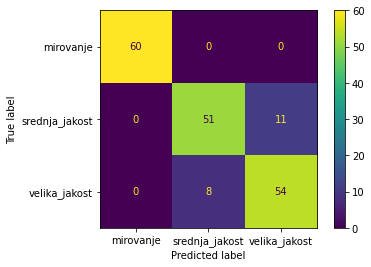

In [22]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# datoteke -> list of csv files with classification results (files must be written in order of classification class indices (alphabeticall order of class names))
# imenaRazredov -> list of class names for values to be classified to (order is not important as it gets sorted alphabetically)
def CA_F1_Matrix(datoteke, imenaRazredov):
    dfPred = pd.DataFrame()
    arrayTrue = []

    for indeks, dat in enumerate(datoteke):
        df = pd.read_csv(dat, skiprows=[1, 2, 3]) 
        df.columns.values[0] = "class"

        dfPred = pd.concat([dfPred, df], axis=0)

        countVal = 0

        for i in df['class'].value_counts().index:
            countVal += df['class'].value_counts()[i]

        arrayTrue += [indeks] * countVal


    ###### Print classification accuracy and F1 score
    ca = accuracy_score(arrayTrue, dfPred['class'].values.tolist())
    f1 = f1_score(arrayTrue, dfPred['class'].values.tolist(), average='weighted')

    print("Klasifikacijska tocnost: " + str(ca))
    print("Mera F1: " + str(f1))

    ###### Display confusion matrix
    matrika = confusion_matrix(arrayTrue, dfPred['class'].values.tolist())

    orderedClassNames = imenaRazredov.copy()
    orderedClassNames.sort()

    disp = ConfusionMatrixDisplay(confusion_matrix=matrika, display_labels=orderedClassNames)
    disp.plot()
    plt.show()


###################################################################################################################################################################################


datoteke = ["../../Zajeti_podatki/Jakost_gibanja/Rezultati_klasifikacij-X-CUBE-AI/Nakljucni_gozd/validacija-mirovanje.csv",
            "../../Zajeti_podatki/Jakost_gibanja/Rezultati_klasifikacij-X-CUBE-AI/Nakljucni_gozd/validacija-srednja_jakost.csv",
            "../../Zajeti_podatki/Jakost_gibanja/Rezultati_klasifikacij-X-CUBE-AI/Nakljucni_gozd/validacija-velika_jakost.csv"]

imenaRazredov = ["mirovanje", "srednja_jakost", "velika_jakost"]

CA_F1_Matrix(datoteke, imenaRazredov)

## NanoEdge AI Studio: Izracun klasifikacijske tocnosti in mere F1 ter prikaz tabele napacnih klasifikacij (Rezultati modela nakljucnega gozda iz NanoEdge AI Studio)

Klasifikacijska tocnost: 0.8532608695652174
Mera F1: 0.8510817193871548


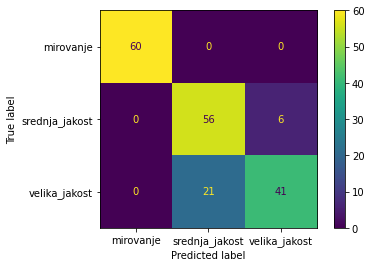

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# trueClasses -> list of true classification classes
# predictedClasses -> list of predicted classification classes (has to be same length as trueClasses)
# classNames -> list of classification class names (in alphabetical order)
def NEAIS_CA_F1_Matrix(trueClasses, predictedClasses, classNames):
    ca = accuracy_score(trueClasses, predictedClasses)
    f1 = f1_score(trueClasses, predictedClasses, average='weighted')
    print("Klasifikacijska tocnost: " + str(ca))
    print("Mera F1: " + str(f1))

    matrika = confusion_matrix(trueClasses, predictedClasses)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=matrika, display_labels=classNames)
    disp.plot()
    plt.show()


arrayPredicted = [0] * 60 + [1] * 56 + [2] * 6 + [2] * 41 + [1] * 21
arrayTrue = [0] * 60 + [1] * 62 + [2] * 62
imenaRazredov = ["mirovanje", "srednja_jakost", "velika_jakost"]
NEAIS_CA_F1_Matrix(arrayTrue, arrayPredicted, imenaRazredov)


---

# Hoja oseb

## Pregled ali se v Orange Data Mining izvede predprocesiranje podatkov pred klasifikacijo z nakljucnim gozdom (V tem primeru se zamenjajo le manjkajoce vrednosti (ki jih v nasih podatkih ni), pri vseh 16ih atributih) 

In [20]:
import pickle

with open('../../Orange_Data_Mining/Hoja_oseb/Nakljucni_gozd-Hoja_oseb.pkcls', 'rb') as model:
    lr = pickle.load(model)

#LOCENO PREVERJANJE VSAKEGA ATRIBUTA (ukaz print() ne izpise predprocesiranja podatkov za posamezni atribut)
#lr.domain
#lr.domain[0]
#lr.domain[1]
#lr.domain[2]
#lr.domain[3]
#lr.domain[4]
#lr.domain[5]
#lr.domain[6]
#lr.domain[7]
#lr.domain[8]
#lr.domain[9]
#lr.domain[10]
#lr.domain[11]
#lr.domain[12]
#lr.domain[13]
#lr.domain[14]
lr.domain[15]

ContinuousVariable(name='F16_acc_Magnituda_RMS',
                   number_of_decimals=3,
                   compute_value=ReplaceUnknowns(variable=ContinuousVariable(name='F16_acc_Magnituda_RMS',
                                                      number_of_decimals=3),
                                   value=1.1134635041015108))

## Pretvorba nakljucnega gozda iz Orange Data Mining v ONNX format

In [26]:
nakljucniGozd = '../../Orange_Data_Mining/Hoja_oseb/Nakljucni_gozd-Hoja_oseb.pkcls'
nakljucniGozdONNX = "Nakljucni_gozd-Hoja_oseb-ONNX.onnx"

orangeToONNX(nakljucniGozd, nakljucniGozdONNX, 16)

## Izracun klasifikacijske tocnosti in mere F1 ter prikaz tabele napacnih klasifikacij (Rezultati iz X-CUBE-AI)

Klasifikacijska tocnost: 0.9343780607247796
Mera F1: 0.9338266094006059


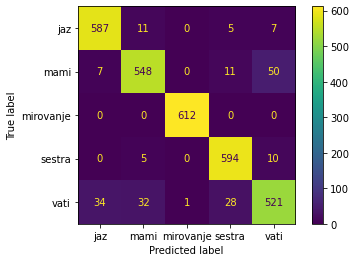

In [23]:
datoteke = ["../../Zajeti_podatki/Hoja_oseb/Rezultati_klasifikacij-X-CUBE-AI/Nakljucni_gozd/REZULTATI-Jaz.csv",
            "../../Zajeti_podatki/Hoja_oseb/Rezultati_klasifikacij-X-CUBE-AI/Nakljucni_gozd/REZULTATI-Mami.csv",
            "../../Zajeti_podatki/Hoja_oseb/Rezultati_klasifikacij-X-CUBE-AI/Nakljucni_gozd/REZULTATI-Mirovanje.csv",
            "../../Zajeti_podatki/Hoja_oseb/Rezultati_klasifikacij-X-CUBE-AI/Nakljucni_gozd/REZULTATI-Sestra.csv",
            "../../Zajeti_podatki/Hoja_oseb/Rezultati_klasifikacij-X-CUBE-AI/Nakljucni_gozd/REZULTATI-Vati.csv",]

imenaRazredov = ["jaz", "mami", "mirovanje", "sestra", "vati"]

CA_F1_Matrix(datoteke, imenaRazredov)

## NanoEdge AI Studio: Izracun klasifikacijske tocnosti in mere F1 ter prikaz tabele napacnih klasifikacij (Rezultati modela nakljucnega gozda iz NanoEdge AI Studio)

Klasifikacijska tocnost: 0.6392425726412014
Mera F1: 0.5937187812153505


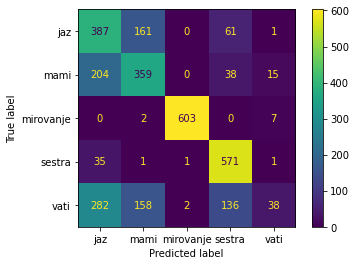

In [2]:
arrayPredicted = [0] * 387 + [1] * 161 + [3] * 61 + [4] * 1 +    [1] * 359 + [0] * 204 + [3] * 38 + [4] * 15 +    [2] * 603 + [1] * 2 + [4] * 7 +    [3] * 571 + [0] * 35 + [1] * 1 + [2] * 1 + [4] * 1 +    [4] * 38 + [0] * 282 + [1] * 158 + [2] * 2 + [3] * 136
arrayTrue = [0] * 610 + [1] * 616 + [2] * 612 + [3] * 609 + [4] * 616
imenaRazredov = ["jaz", "mami", "mirovanje", "sestra", "vati"]
NEAIS_CA_F1_Matrix(arrayTrue, arrayPredicted, imenaRazredov)